# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [78]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [79]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [80]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [81]:
crops.isna().sum()
crops["crop"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

In [82]:
y= crops["crop"]
X_train,X_test,y_train,y_test=train_test_split(    
    crops[["N", "P", "K", "ph"]],
    y,
    test_size=0.2,
    random_state=42)

In [83]:
for f in ["N", "P", "K", "ph"]:
    model = LogisticRegression(max_iter=2000,multi_class='multinomial')
    model.fit(X_train[[f]],y_train)
    y_pred = model.predict(X_test[[f]])
    f_error = f1_score(y_test,y_pred,average='weighted')
    print(f"F1-score for {f}: {f_error}")

F1-score for N: 0.10507916708090527
F1-score for P: 0.10457380486654515
F1-score for K: 0.2007873036107074
F1-score for ph: 0.04532731061152114


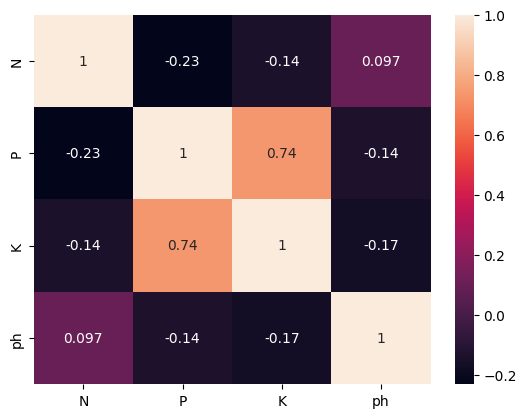

In [84]:
sns.heatmap(crop_loop.corr(),annot=True)
plt.show()

In [85]:
crops_dummy=pd.get_dummies(crops['crop'],drop_first=True)
crops_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   banana       2200 non-null   uint8
 1   blackgram    2200 non-null   uint8
 2   chickpea     2200 non-null   uint8
 3   coconut      2200 non-null   uint8
 4   coffee       2200 non-null   uint8
 5   cotton       2200 non-null   uint8
 6   grapes       2200 non-null   uint8
 7   jute         2200 non-null   uint8
 8   kidneybeans  2200 non-null   uint8
 9   lentil       2200 non-null   uint8
 10  maize        2200 non-null   uint8
 11  mango        2200 non-null   uint8
 12  mothbeans    2200 non-null   uint8
 13  mungbean     2200 non-null   uint8
 14  muskmelon    2200 non-null   uint8
 15  orange       2200 non-null   uint8
 16  papaya       2200 non-null   uint8
 17  pigeonpeas   2200 non-null   uint8
 18  pomegranate  2200 non-null   uint8
 19  rice         2200 non-null   uint8
 20  watermel

In [86]:
crops_dummy = pd.concat([crops, crops_dummy], axis=1) 
crops_dummy = crops_dummy.drop("crop", axis=1)
crops_dummy

,N,P,K,ph,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,lentil,maize,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,6.502985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,85,58,41,7.038096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,55,44,7.840207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,74,35,40,6.980401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,78,42,42,7.628473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,6.780064,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2196,99,15,27,6.086922,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2197,118,33,30,6.362608,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2198,117,32,34,6.758793,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
final_features =['N','K','ph']
X_train, X_test, y_train, y_test = train_test_split(
    crops[final_features],
    crops["crop"],
    test_size=0.2,
    random_state=42
)
log_reg = LogisticRegression(max_iter=2000,multi_class='multinomial')
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
f_error = f1_score(y_test,y_pred,average='weighted')
model_performance = f1_score(y_test, y_pred, average="weighted")
print(model_performance)

0.558010495235685
